<a href="https://colab.research.google.com/github/mdellanina/TrabajoPracticoCODERHOUSE/blob/main/AyudaTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from seaborn import boxplot, histplot
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
from mpl_toolkits.mplot3d import Axes3D

path = "https://github.com/mdellanina/TrabajoPracticoCODERHOUSE/raw/main/SolarPrediction/SolarPrediction.csv"
df = pd.read_csv(path)
df['Data']=pd.to_datetime(df['Data'], format='%m/%d/%Y %I:%M:%S %p')
# El campo UNIXTime podria eliminarse, ya que es redundante (Solo es una ref de fecha global)
df = df.drop(['UNIXTime'], axis=1)
# El Campo "Data" estaba en formato dateTime y se cambia a Object para que la tome como categorica.
df['Data'] = df['Data'].astype(str)
display(df)

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,2016-12-01,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,2016-12-01,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,2016-12-01,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [2]:
# Agregamos una columna nueva con un string diferente representando los 4 puntos cardinales principales, a partir de calcular si la variable "WindDirección(Degrees)" varia entre 4 diferentes rangos de angulos.

def categorize_wind_direction(row):
    direction = row["WindDirection(Degrees)"]
    if (0 <= direction < 45) or (315 <= direction <= 360) :
        return "Norte"
    elif 45 < direction <= 135:
        return "Este"
    elif 135 < direction <= 225:
        return "Sur"
    else:
        return "Oeste"

df["WindDirectionCategory"] = df.apply(categorize_wind_direction, axis=1)


In [3]:
# reemplazar el valor de "Temperature" que esta medida en °F a °C
df['Temperature'] = (df['Temperature'] - 32) * 5/9
# reemplazar el valor de "Speed" que esta medida en mph a km/h
df['Speed'] = df['Speed'] * 1.609344


In [4]:
# Agregamos una columna nueva con un string diferente representando los 9 denominaciones de vientos, a partir de calcular si la variable "Speed" varia entre 9 diferentes rangos de velocidades.

def categorize_wind_speed(row):
    speed = row["Speed"]
    if 1 <= speed <= 11:
        return "Brisa Suave"
    elif 11 < speed <= 28:
        return "Leve a moderado"
    elif 28 < speed <= 48:
        return "Regulares a Fuertes"
    elif 48 < speed <= 73:
        return "Muy Fuertes o Temporales"
    else:
        return "Temporal muy fuerte o Huracan"

df["WindSpeedCategory"] = df.apply(categorize_wind_speed, axis=1)

In [5]:
df

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,WindDirectionCategory,WindSpeedCategory
0,2016-09-29,23:55:26,1.21,8.888889,30.46,59,177.39,9.044513,06:13:00,18:13:00,Sur,Brisa Suave
1,2016-09-29,23:50:23,1.21,8.888889,30.46,58,176.78,5.423489,06:13:00,18:13:00,Sur,Brisa Suave
2,2016-09-29,23:45:26,1.23,8.888889,30.46,57,158.75,5.423489,06:13:00,18:13:00,Sur,Brisa Suave
3,2016-09-29,23:40:21,1.21,8.888889,30.46,60,137.71,5.423489,06:13:00,18:13:00,Sur,Brisa Suave
4,2016-09-29,23:35:24,1.17,8.888889,30.46,62,104.95,9.044513,06:13:00,18:13:00,Este,Brisa Suave
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01,00:20:04,1.22,6.666667,30.43,102,145.42,10.863072,06:41:00,17:42:00,Sur,Brisa Suave
32682,2016-12-01,00:15:01,1.17,6.666667,30.42,102,117.78,10.863072,06:41:00,17:42:00,Este,Brisa Suave
32683,2016-12-01,00:10:01,1.20,6.666667,30.42,102,145.19,14.484096,06:41:00,17:42:00,Sur,Leve a moderado
32684,2016-12-01,00:05:02,1.23,6.666667,30.42,101,164.19,12.665537,06:41:00,17:42:00,Sur,Leve a moderado


In [6]:
df.describe().round(2)

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.00,32686.00,32686.00,32686.00,32686.00,32686.00
mean,207.12,10.61,30.42,75.02,143.49,10.05
std,315.92,3.45,0.05,25.99,83.17,5.62
min,1.11,1.11,30.19,8.00,0.09,0.00
25%,1.23,7.78,30.40,56.00,82.23,5.42
50%,2.66,10.00,30.43,85.00,147.70,9.04
75%,354.24,12.78,30.46,97.00,179.31,12.67
max,1601.26,21.67,30.56,103.00,359.95,65.18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    32686 non-null  object 
 1   Time                    32686 non-null  object 
 2   Radiation               32686 non-null  float64
 3   Temperature             32686 non-null  float64
 4   Pressure                32686 non-null  float64
 5   Humidity                32686 non-null  int64  
 6   WindDirection(Degrees)  32686 non-null  float64
 7   Speed                   32686 non-null  float64
 8   TimeSunRise             32686 non-null  object 
 9   TimeSunSet              32686 non-null  object 
 10  WindDirectionCategory   32686 non-null  object 
 11  WindSpeedCategory       32686 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 3.0+ MB


In [8]:
df.describe(include = 'object')

,Data,Time,TimeSunRise,TimeSunSet,WindDirectionCategory,WindSpeedCategory
count,32686,32686,32686,32686,32686,32686
unique,118,8299,51,56,4,5
top,2016-12-01,16:20:18,06:11:00,17:42:00,Sur,Brisa Suave
freq,288,24,1399,3682,14494,21462


In [9]:
df_max_rad=df[['Radiation','WindDirectionCategory', 'WindSpeedCategory']].groupby(by=['WindDirectionCategory', 'WindSpeedCategory']).max().reset_index()
print(df_max_rad)
df_sum_rad=df[['Radiation','WindDirectionCategory', 'WindSpeedCategory']].groupby(by=['WindDirectionCategory', 'WindSpeedCategory']).mean().reset_index()
print(df_sum_rad)

   WindDirectionCategory              WindSpeedCategory  Radiation
0                   Este                    Brisa Suave    1359.79
1                   Este                Leve a moderado    1410.52
2                   Este            Regulares a Fuertes    1035.48
3                   Este  Temporal muy fuerte o Huracan    1161.37
4                  Norte                    Brisa Suave    1475.40
5                  Norte                Leve a moderado    1601.26
6                  Norte            Regulares a Fuertes     884.59
7                  Norte  Temporal muy fuerte o Huracan     969.34
8                  Oeste                    Brisa Suave    1276.21
9                  Oeste                Leve a moderado    1213.55
10                 Oeste       Muy Fuertes o Temporales     769.40
11                 Oeste            Regulares a Fuertes    1009.44
12                 Oeste  Temporal muy fuerte o Huracan     543.59
13                   Sur                    Brisa Suave    126

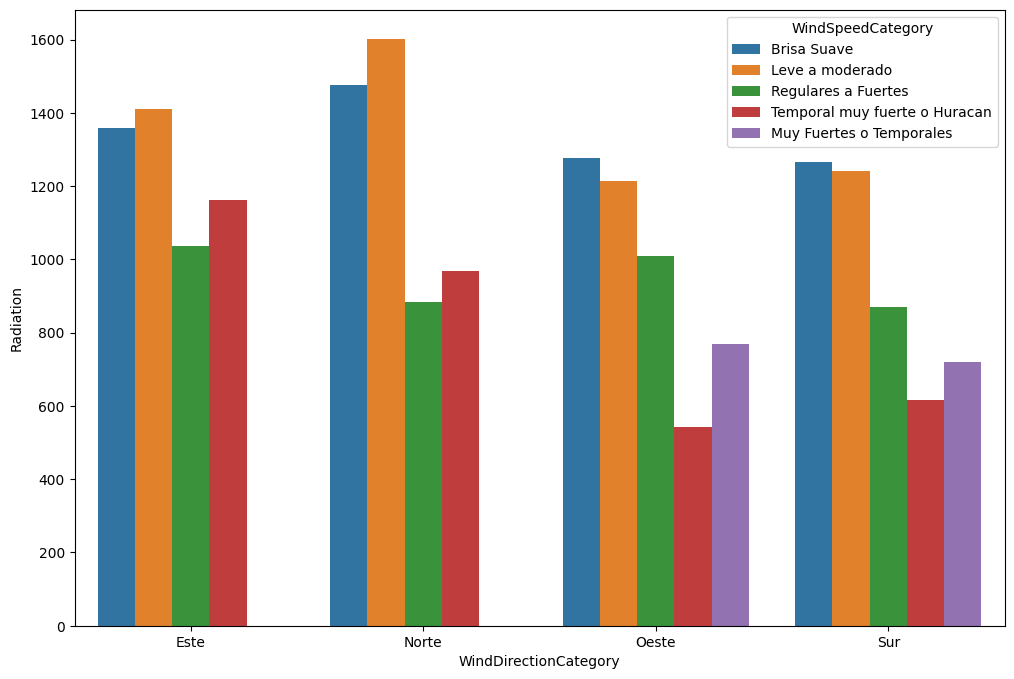

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(y='Radiation',x='WindDirectionCategory',hue='WindSpeedCategory',data=df_max_rad);

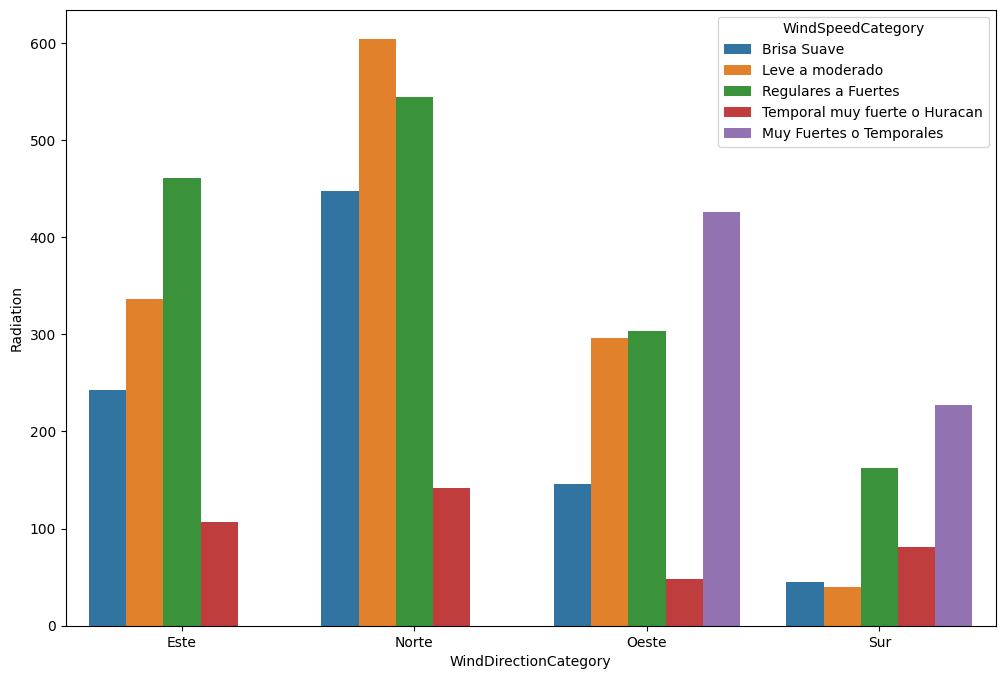

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(y='Radiation',x='WindDirectionCategory',hue='WindSpeedCategory',data=df_sum_rad);

In [ ]:
# prompt: que hace esta linea? df_max_rad=df[['Radiation','WindDirectionCategory', 'WindSpeedCategory']].groupby(by=['WindDirectionCategory', 'WindSpeedCategory']).max().reset_index()

The line `df_max_rad=df[['Radiation','WindDirectionCategory', 'WindSpeedCategory']].groupby(by=['WindDirectionCategory', 'WindSpeedCategory']).max().reset_index()` performs the following actions:

1. **Subset the DataFrame**:

- It selects a subset of the `df` DataFrame containing only three columns: `Radiation`, `WindDirectionCategory`, and `WindSpeedCategory`.

2. **Group by Multiple Columns**:

- It groups the subsetted DataFrame by two categorical columns: `WindDirectionCategory` and `WindSpeedCategory`.

3. **Calculate Maximum Values**:

- For each group defined by the combination of `WindDirectionCategory` and `WindSpeedCategory`, it calculates the maximum value of the `Radiation` column.

4. **Reset the Index**:

- After grouping, the index of the DataFrame is changed to a hierarchical index based on the grouping columns. The `reset_index()` method is used to reset the index to a regular numerical index.

5. **Store the Result**:

- The resulting DataFrame with maximum radiation values for each combination of `WindDirectionCategory` and `WindSpeedCategory` is stored in the `df_max_rad` variable.

In summary, this line of code groups the DataFrame by two categorical columns, calculates the maximum radiation value for each group, and then resets the index to create a new DataFrame with the maximum radiation values for each combination of wind direction category and wind speed category.